In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [3]:
# Загружаем данные из pandas
data = pd.read_csv('../csv_file/train.csv')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_20732\1310205317.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449

In [4]:
print("Train Data Info ----------------------------------------------:")
print(data.info())
print("\nTrain Data Head -------------------------------------------:")
print(data.head())

Train Data Info ----------------------------------------------:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB
None

Train Data Head -------------------------------------------:
  report_date  client_id  target  col1  col2  col3  col4  col5  col6  col7  \
0  2022-11-01          1       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  2022-11-01          5       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  2022-05-01          6       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  2022-09-01          7       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  2022-08-01          8       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...    col2654    col2655    col2656  col2657  col2658  col2659    col2660  \
0  ...        NaN        NaN        NaN      NaN      NaN      NaN        NaN   
1  ...  7616803.0  7616803.0  7616803.0      Na

In [5]:
data.isnull().sum()

report_date        0
client_id          0
target             0
col1           14453
col2           14450
               ...  
col2659        13950
col2660         6420
col2661         6420
col2662         6420
col2663            0
Length: 2666, dtype: int64

In [6]:
threshold = 14000
missing_counts = data.isnull().sum()
columns_to_drop = missing_counts[missing_counts > threshold].index
data = data.drop(columns=columns_to_drop)

In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.heatmap(data.isna(), cmap="viridis", cbar=False)
# plt.title("Визуализация пропусков")
# plt.show()


In [8]:
print("Размер данных до удаления:", data.shape)
data = data.dropna(axis=1, how='all')
print("Размер данных после удаления:", data.shape)


Размер данных до удаления: (14456, 1172)
Размер данных после удаления: (14456, 1172)


In [9]:
missing_percentage = data.isnull().mean() * 100

print("Процент пропусков в каждой колонке:")
print(missing_percentage)

Процент пропусков в каждой колонке:
report_date     0.000000
client_id       0.000000
target          0.000000
col124         95.752629
col128         95.752629
                 ...    
col2659        96.499723
col2660        44.410625
col2661        44.410625
col2662        44.410625
col2663         0.000000
Length: 1172, dtype: float64


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 1172 entries, report_date to col2663
dtypes: float64(1091), int64(3), object(78)
memory usage: 129.3+ MB


In [11]:
data.dtypes

report_date     object
client_id        int64
target           int64
col124         float64
col128         float64
                ...   
col2659        float64
col2660        float64
col2661        float64
col2662        float64
col2663        float64
Length: 1172, dtype: object

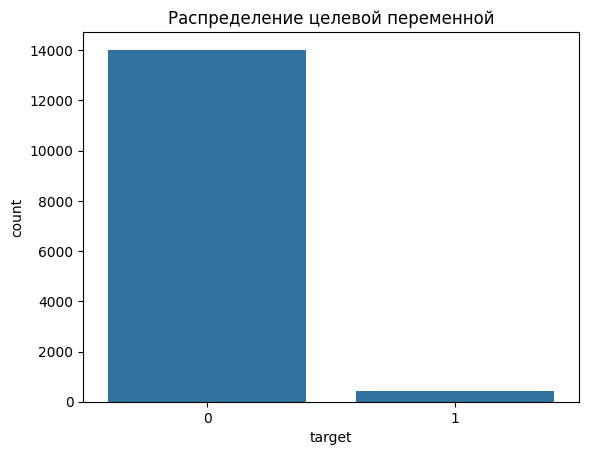

In [12]:
sns.countplot(x='target', data=data)
plt.title('Распределение целевой переменной')
plt.show()

In [13]:
data.describe()

,client_id,target,col124,col128,col220,col247,col248,col251,col252,col255,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
count,14456.000000,14456.000000,614.000000,614.000000,688.000000,541.000000,887.000000,541.000000,887.000000,545.000000,...,6.207000e+03,6.207000e+03,6.207000e+03,5.060000e+02,5.060000e+02,5.060000e+02,8.036000e+03,8.036000e+03,8.036000e+03,14456.000000
mean,2853.066270,0.030160,0.027925,0.044640,0.968238,0.605621,0.608594,0.500136,0.516366,0.065764,...,6.951439e+06,6.843002e+06,6.896837e+06,7.042210e+06,7.025990e+06,7.034100e+06,6.934524e+06,6.806725e+06,6.869273e+06,0.258330
std,1957.002315,0.171035,0.104297,0.087427,0.132012,0.457634,0.446072,0.417210,0.399575,0.126842,...,4.539805e+06,4.509677e+06,4.509058e+06,5.162596e+06,5.160387e+06,5.160985e+06,4.354458e+06,4.315602e+06,4.314412e+06,0.006802
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000e+05,1.000000e+05,3.000000e+05,4.692700e+05,4.692700e+05,4.692700e+05,3.000000e+05,1.000000e+05,3.000000e+05,0.230229
25%,1186.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.076923,0.000000,...,4.316300e+06,4.248000e+06,4.300000e+06,4.413816e+06,4.413816e+06,4.413816e+06,4.334639e+06,4.276000e+06,4.303000e+06,0.256261
50%,2568.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000,0.500000,0.000000,...,6.240000e+06,6.164000e+06,6.224000e+06,6.322850e+06,6.322850e+06,6.322850e+06,6.244578e+06,6.146774e+06,6.225550e+06,0.256261
75%,4258.250000,0.000000,0.000000,0.058824,1.000000,1.000000,1.000000,1.000000,0.965809,0.076923,...,8.801262e+06,8.649254e+06,8.748625e+06,9.110361e+06,9.110361e+06,9.110361e+06,8.769750e+06,8.619750e+06,8.700000e+06,0.257217
max,8302.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000,...,9.800000e+07,9.800000e+07,9.800000e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.339800


In [ ]:
cols = data.columns
#фиолетовые - не пропущенные данные, желтые - пропущенные
colours = ['#8b00ff', '#ffff00']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
data.head(10)

,report_date,client_id,target,col124,col128,col136,col148,col152,col160,col220,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,NaN,NaN,NaN,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,0.0,0.0,flat-detail-aside,NaN,booking_storage,Новоданиловская 8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [ ]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

report_date     0.000000
client_id       0.000000
target          0.000000
col124         95.752629
col128         95.752629
                 ...    
col2659        96.499723
col2660        44.410625
col2661        44.410625
col2662        44.410625
col2663         0.000000
Length: 1172, dtype: float64


In [ ]:
# # Установить максимальное количество строк и столбцов для отображения
# pd.set_option('display.max_rows', None)  # Показывать все строки
# pd.set_option('display.max_columns', None)  # Показывать все столбцы

# # Для удобства ширину столбцов тоже можно увеличить
# pd.set_option('display.width', 1000)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
df_sorted = data.sort_values(by='col2663', ascending=False)
df_sorted.head()

,report_date,client_id,target,col124,col128,col136,col148,col152,col160,col220,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
14073,2023-02-01,1150,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
8996,2022-11-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
6389,2022-12-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
790,2022-08-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
564,2023-02-01,843,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338927


In [ ]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14456 entries, 14073 to 6042
Columns: 1172 entries, report_date to col2663
dtypes: float64(1091), int64(3), object(78)
memory usage: 129.4+ MB


In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': ['report_date', 'col136', 'col148', 'col152', 'col160', 'col224', 'col227', 'col228', 'col460', 'col463', 'col464', 'col468', 'col471', 'col472', 'col516', 'col517', 'col518', 'col519', 'col520', 'col523', 'col524', 'col525', 'col526', 'col527', 'col528', 'col531', 'col532', 'col533', 'col534', 'col535', 'col536', 'col539', 'col540', 'col541', 'col542', 'col543', 'col544', 'col547', 'col548', 'col549', 'col550', 'col551', 'col552', 'col556', 'col558', 'col559', 'col560', 'col567', 'col568', 'col575', 'col576', 'col584', 'col587', 'col588', 'col589', 'col590', 'col591', 'col592', 'col596', 'col597', 'col598', 'col599', 'col600', 'col604', 'col605', 'col606', 'col607', 'col608', 'col614', 'col615', 'col616', 'col796', 'col799', 'col800', 'col1052', 'col1060', 'col1068', 'col1454']


In [ ]:
df_sorted = df_sorted.drop(columns=['report_date', 'col136', 'col148', 'col152', 'col160', 'col224', 'col227', 'col228', 'col460', 'col463', 'col464', 'col468', 'col471', 'col472', 'col516', 'col517', 'col518', 'col519', 'col520', 'col523', 'col524', 'col525', 'col526', 'col527', 'col528', 'col531', 'col532', 'col533', 'col534', 'col535', 'col536', 'col539', 'col540', 'col541', 'col542', 'col543', 'col544', 'col547', 'col548', 'col549', 'col550', 'col551', 'col552', 'col556', 'col558', 'col559', 'col560', 'col567', 'col568', 'col575', 'col576', 'col584', 'col587', 'col588', 'col589', 'col590', 'col591', 'col592', 'col596', 'col597', 'col598', 'col599', 'col600', 'col604', 'col605', 'col606', 'col607', 'col608', 'col614', 'col615', 'col616', 'col796', 'col799', 'col800', 'col1052', 'col1060', 'col1068', 'col1454'])


In [ ]:
object_columns = df_sorted.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': []


In [ ]:
df_sorted.info()
df_sorted.shape

NameError: name 'df_sorted' is not defined

In [ ]:
# Получаем список уникальных типов данных
dtypes = df_sorted.dtypes.unique()

# Просматриваем данные для каждого типа
for dtype in dtypes:
    print(f"\nКолонки с типом {dtype}:")
    cols = df_sorted.select_dtypes(include=[dtype]).columns
    print(df_sorted[cols])


Колонки с типом int64:
       client_id  target  col1453
14073       1150       1        0
8996        1150       0        0
6389        1150       0        0
790         1150       0        0
564          843       0        0
...          ...     ...      ...
9506        4512       0        0
7473        4512       0        0
8372        4512       0        0
10082       4512       0        0
6042        4512       0        0

[14456 rows x 3 columns]

Колонки с типом float64:
       col124  col128  col220  col247  col248  col251  col252  col255  col256  \
14073     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8996      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6389      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
790       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
564       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...       ...     ...     ... 

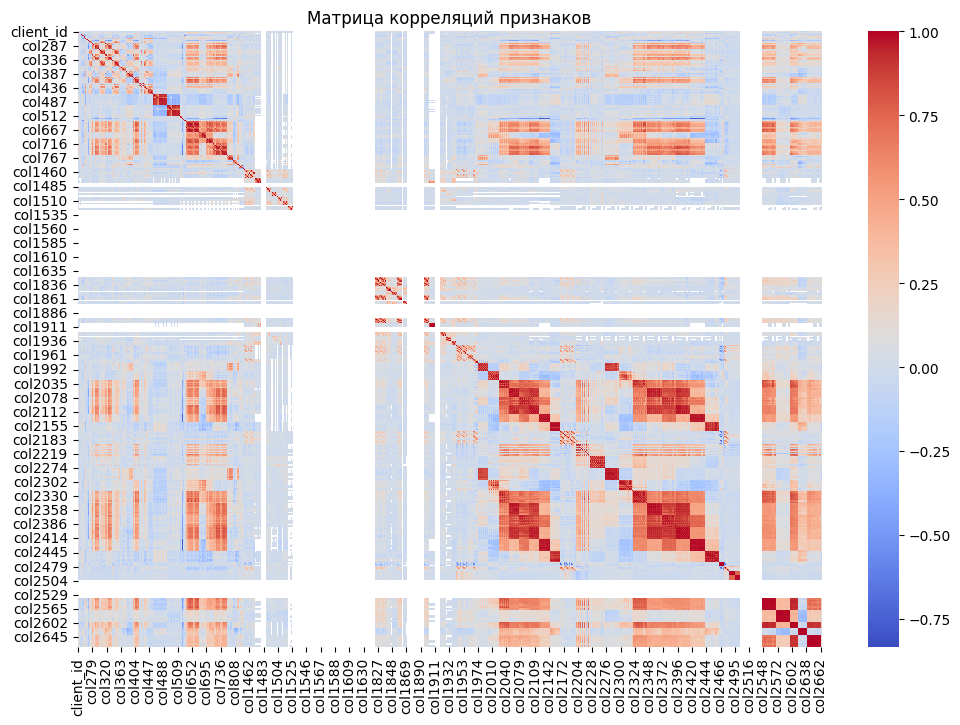

In [ ]:
# Анализ корреляций
correlation_matrix = df_sorted.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Матрица корреляций признаков')
plt.show()